# Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [7]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Defining Supervisor

In [8]:
y = df['Y']
y

0        1
1        0
2        1
3        0
4        0
        ..
12679    1
12680    1
12681    0
12682    0
12683    0
Name: Y, Length: 12684, dtype: int64

# Redefining Dataset

In [9]:
df = df.drop(['Y'] , axis=1 )
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,1,0,1


In [10]:
X = df
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,never,1~3,4~8,1~3,1,1,1,0,1


# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [13]:
X = X.apply(LabelEncoder().fit_transform)
X

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,1,0,2,1,2,4,0,0,0,3,...,4,4,5,1,0,0,0,0,0,1
1,1,1,2,2,0,2,1,0,0,3,...,4,4,5,1,0,0,0,0,0,1
2,1,1,2,2,0,1,1,0,0,3,...,4,4,5,1,0,0,1,0,0,1
3,1,1,2,2,2,2,1,0,0,3,...,4,4,5,1,0,0,1,0,0,1
4,1,1,2,2,2,2,0,0,0,3,...,4,4,5,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,1,3,1,0,1,1,2,...,4,4,0,1,0,0,0,0,1,0
12680,2,0,0,1,4,1,0,1,1,2,...,4,4,0,1,0,0,0,0,0,1
12681,2,0,1,0,4,2,0,1,1,2,...,4,4,0,1,0,0,0,0,1,0
12682,2,0,1,0,4,0,0,1,1,2,...,4,4,0,1,0,0,1,1,0,1


# Defining Training and Testing Data

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

print ( X_train )
print ( X_test )
print ( y_train )
print ( y_test )

       destination  passanger  weather  temperature  time  coupon  expiration  \
5282             1          1        2            2     0       2           1   
11372            1          1        1            0     2       4           0   
11650            2          0        0            1     4       4           1   
8733             2          0        0            1     4       4           1   
7663             1          0        2            2     0       2           0   
...            ...        ...      ...          ...   ...     ...         ...   
10955            1          0        0            1     0       0           0   
905              1          1        2            2     2       2           1   
5192             2          0        2            1     4       2           0   
12172            2          0        2            2     4       3           1   
235              2          0        2            1     4       4           0   

       gender  age  marital

# Data Normalization

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train)
print(X_test)

[[ 0.01329411  0.34964955  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]
 [ 0.01329411  0.34964955 -1.10204528 ... -0.36899182 -0.5253867
   0.5253867 ]
 [ 1.41845367 -0.71323061 -2.68171097 ... -0.36899182  1.90335994
  -1.90335994]
 ...
 [ 1.41845367 -0.71323061  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]
 [ 1.41845367 -0.71323061  0.47762041 ... -0.36899182  1.90335994
  -1.90335994]
 [ 1.41845367 -0.71323061  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]]
[[-1.39186546 -0.71323061 -1.10204528 ... -0.36899182 -0.5253867
   0.5253867 ]
 [ 0.01329411  0.34964955  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]
 [ 0.01329411  2.47540987  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]
 ...
 [ 0.01329411 -0.71323061  0.47762041 ... -0.36899182 -0.5253867
   0.5253867 ]
 [-1.39186546 -0.71323061  0.47762041 ...  2.71008715 -0.5253867
   0.5253867 ]
 [ 1.41845367 -0.71323061 -1.10204528 ... -0.36899182 -0.5253867
   0.5253867 ]]


# Training Model

In [17]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Prediction

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [1 0]
 [0 1]
 [1 1]]


# Confusion Matrix and Accuracy 

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy is : ",  accuracy_score(y_test, y_pred))
print("Precision is : ", precision_score(y_test, y_pred))
print("Recall Score is : ", recall_score(y_test, y_pred))

[[ 515  563]
 [ 416 1043]]
Accuracy is :  0.6141111549073709
Precision is :  0.6494396014943961
Recall Score is :  0.7148732008224812


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.48      0.51      1078
           1       0.65      0.71      0.68      1459

    accuracy                           0.61      2537
   macro avg       0.60      0.60      0.60      2537
weighted avg       0.61      0.61      0.61      2537



# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Graph

In [28]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

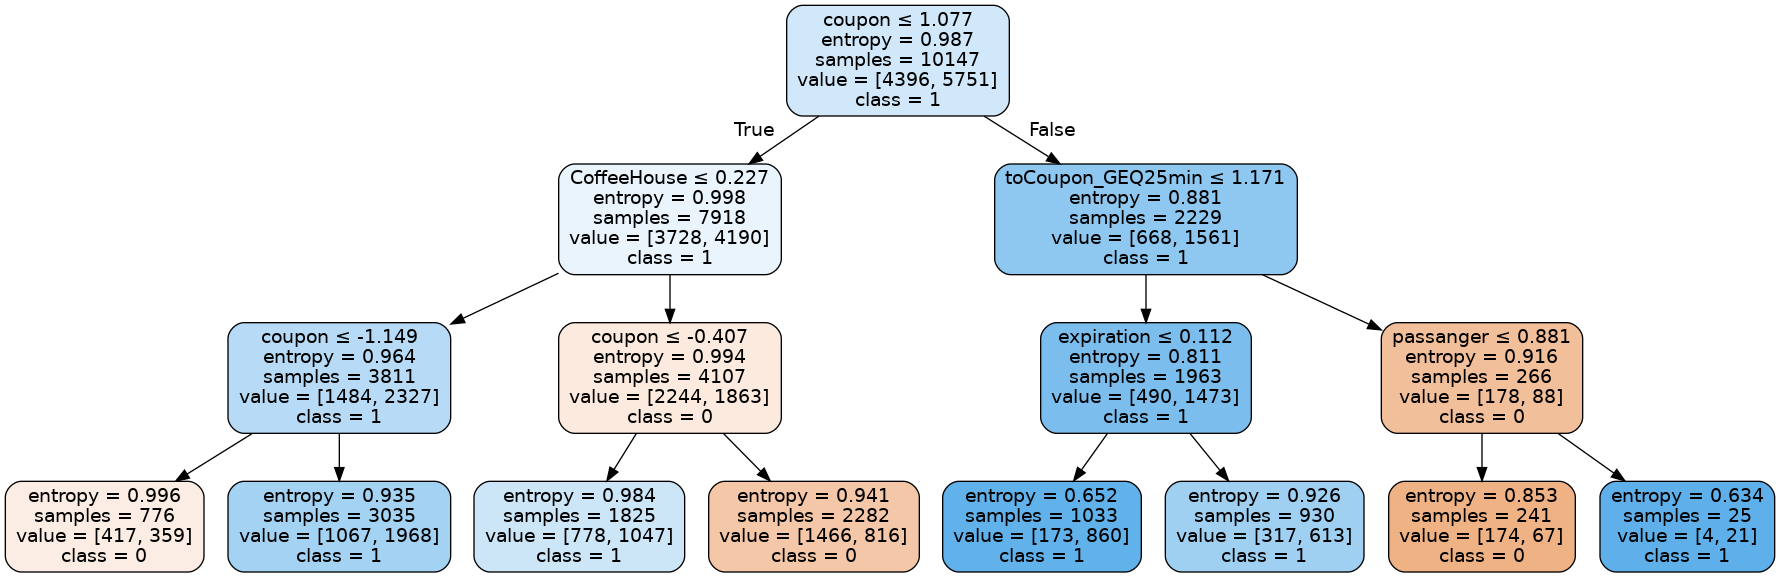

In [29]:
feature_cols = list(df.columns)

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Coupon.png')
Image(graph.create_png())